In [1]:
#%#Cell 1 - Import Libraries & Setup Paths

import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split

sns.set(style="whitegrid")
warnings.filterwarnings('ignore')

# Append project root to sys.path (if needed)
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

# Define directories for saving outputs
figures_dir = "../reports/figures"
text_dir = "../reports/text"
processed_dir = "../data/processed"

os.makedirs(figures_dir, exist_ok=True)
os.makedirs(text_dir, exist_ok=True)
os.makedirs(processed_dir, exist_ok=True)

In [2]:
#Cell 2 - Import Modeling Functions

from src.models import train_linear_model, evaluate_model, save_model

print("Modeling functions imported successfully.")

Modeling functions imported successfully.


In [3]:
#Cell 3 - Load Processed Data
# Load the feature-engineered and encoded dataset (ensure you have run feature engineering notebook)

data_path = os.path.join(processed_dir, "train_feature_engineered_encoded.csv")
df = pd.read_csv(data_path)
print("Processed data loaded. Shape:", df.shape)

# Save a sample of the loaded data to text for reference
sample_path = os.path.join(text_dir, "baseline_data_sample.csv")
df.head(10).to_csv(sample_path, index=False)


Processed data loaded. Shape: (1399, 112)


In [6]:
#Cell 4 - Prepare Features and Target, Split Data
# Define the target and feature columns.
# Use only numeric columns for baseline modeling to avoid conversion issues.

numeric_df = df.select_dtypes(include=['number'])

# Ensure 'SalePrice' is present as target
if 'SalePrice' not in numeric_df.columns:
    raise ValueError("Target column 'SalePrice' is not found among numeric features.")

y = numeric_df['SalePrice']
X = numeric_df.drop(columns=['SalePrice'], errors='ignore')

# If an 'Id' column exists (even if numeric), drop it:
if 'Id' in X.columns:
    X = X.drop(columns=['Id'])

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)


Training set shape: (1119, 69)
Validation set shape: (280, 69)


In [7]:
#Cell 5 - Train Baseline Linear Regression Model
# Train a baseline linear regression model using our modular function

baseline_model = train_linear_model(X_train, y_train)
print("Baseline model trained.")

Baseline model trained.


In [8]:
#Cell 6 - Evaluate Baseline Model
# Evaluate the model on the validation set

rmse = evaluate_model(baseline_model, X_val, y_val, model_type='sklearn')
print(f"Baseline Model RMSE on Validation Set: {rmse:.2f}")

# Save evaluation result to text file
eval_path = os.path.join(text_dir, "baseline_model_evaluation.txt")
with open(eval_path, "w") as f:
    f.write(f"Baseline Model RMSE on Validation Set: {rmse:.2f}\n")


Baseline Model RMSE on Validation Set: 19859.58


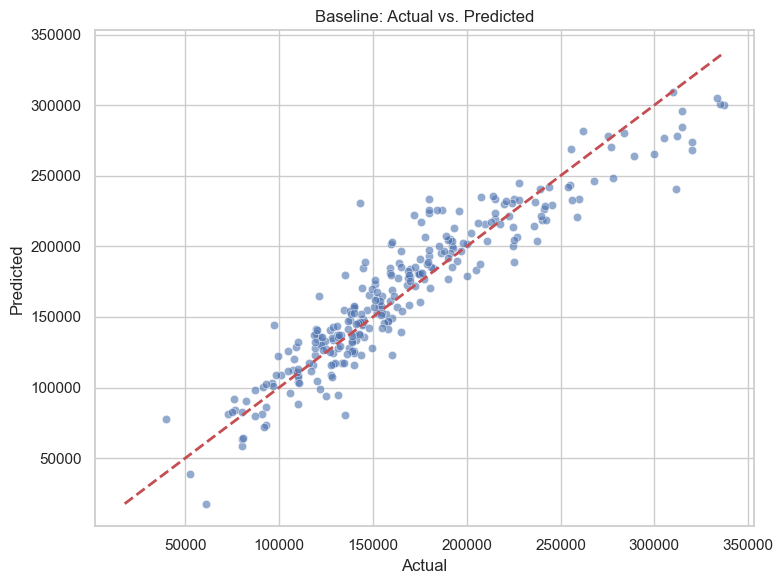

In [9]:
#Cell 7 - Visualize Actual vs. Predicted (Baseline)
# Generate predictions and plot actual vs predicted values.

from src.evaluation import plot_actual_vs_predicted

y_pred = baseline_model.predict(X_val)
plot_path = os.path.join(figures_dir, "baseline_actual_vs_predicted.png")
plot_actual_vs_predicted(y_val, y_pred, title="Baseline: Actual vs. Predicted", save_path=plot_path)

In [10]:
#Cell 8 - Save Trained Baseline Model
# Save the trained model for later use

model_save_path = os.path.join(processed_dir, "baseline_model.pkl")
save_model(baseline_model, model_save_path)


Model saved to ../data/processed/baseline_model.pkl
